In [91]:
import pandas as pd
import numpy as np
import plotly.express as px
import datetime
from datetime import datetime, date

In [92]:
# Настройка вывода данных
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

## Подготовка данных.
### Сбор сырых(исходных) данных.

In [147]:
df_f = pd.read_excel("d.xlsx", sheet_name='Лист1')
# df_f

### Подготовка данных

In [21]:
# Удаление лишних столбцов и колонок
df_clear = df_f.drop(index=[0, 1, 269, 270, 271], columns='Unnamed: 3389').reset_index().drop(columns='index')

In [146]:
# Транспонирование таблицы из строк в столбцы
df_test = df_clear.transpose().reset_index(drop=True)
# df_test

In [23]:
# Применение к строке из списка роли имен колонок.
df_test.columns = df_test.iloc[0]

fragment_01 = df_test.reindex(df_test.index.drop(1)).drop(index=0)
fragment_01 = fragment_01.rename(columns={"Названия строк": 'Дата'}).reset_index(drop=True)
fragment_01.columns.name = 'ID'

In [24]:
# Получить все имена колонок.
fragment_01.columns.tolist()[:5]

['Дата',
 '01. Ноутбуки',
 '01. Нетбуки',
 '02. Ноутбуки',
 '03. Аксессуары для ноутбуков']

In [25]:
# Удаление ненужных колонок
fragment_01 = fragment_01.drop(columns=[
    '01. Ноутбуки',
    '02. Компьютеры',
    'EOL/Не используется',
    '03. Комплектующие',
    '04. Мониторы',
    '05. Сотовые, планшеты и электронные книги',
    '06. Камеры цифровые',
    '07. Карманные гаджеты',
    '08. ТВ и медиа',
    '09. Акустика',
    '10. Кабельная продукция',
    '11. Печатающая офисная техника/Оргтехника',
    '13. Источники бесперебойного питания',
    '14. Мелочи и аксессуары',
    '16. Чехлы и сумки',
    '17. Расходники и накопители информации',
    '18. Бытовая техника',
    '19. Автоэлектроника',
    '20. Интертеймент',
    '21. Сетевое Оборудование',
    '22. Источники питания',
    '23. Сумки',
    '26. Инструменты'
])

In [148]:
# Общее кол-во пропущенных элементов
fragment_01.isnull().sum().sum()

0

In [39]:
# Приведение типа "datetime64" к колонке.
fragment_01['Дата'] = pd.to_datetime(fragment_01['Дата'], format='%Y-%m-%d')
fragment_01 = fragment_01.fillna(0)

In [145]:
# Вынос Мясяца и Года в отдельную колонку.
fragment_01['Месяц'] = fragment_01['Дата'].dt.month
fragment_01['Год'] = fragment_01['Дата'].dt.year
# fragment_01

In [143]:
# fragment_01.columns.tolist()

In [138]:
name = 'Цепные пилы'

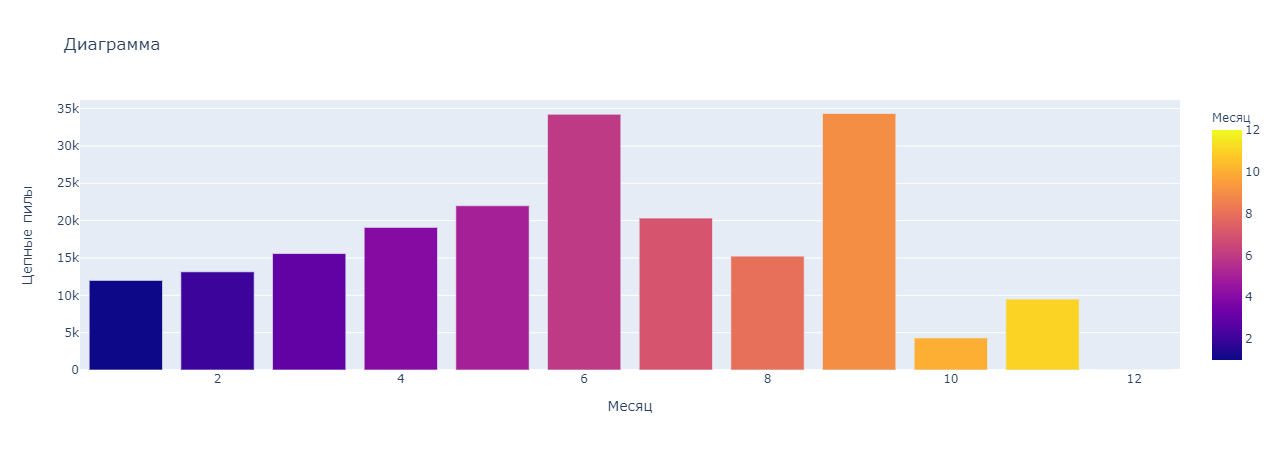

In [149]:
# выборка по конкретной группе общей суммы по месяцам.
group = fragment_01[['Дата', f'{name}']].loc[fragment_01['Год'] == 2020].groupby(fragment_01['Месяц']).sum()
group = group.reset_index()

fig = px.bar(group, 
             x="Месяц", 
             y=name, 
             color="Месяц", 
             title="Диаграмма")
fig.show()